# Predict the Automobile Insurance claim

The purpose of an Insurance is to provide protection against the risk of any financial loss. Insurance is a form of risk management in which an insurer agrees to take the risk of the insured entity against future events, uncertain loss due to Tsunami, earthquake or damage against the vehicle or personal property. Here you will be provided with Automobile insurance claim dataset.

One has to predict the claim amount in the Automobile insurance dataset.

# Importing required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Importing Dataset

In [15]:
data=pd.read_csv("Auto_Insurance_Claims_amount.csv")

In [16]:
data.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [49]:
data.shape

(9134, 26)

# Null Value Analysis

# Null/Missing Value Analysis
Checking the null/missing value is the first and required step in the EDA analyis. Finding Null/Missing value and handling them contributes in the better performance of the model.

In [5]:
data.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

No null/Missing value has been found

In [17]:
#Dropping Customer Country Effective To Date columns
data.drop(['Customer','Country','Effective To Date'],axis=1,inplace=True)

In [18]:
data.shape

(9134, 23)

# Data Visualisation using Plots

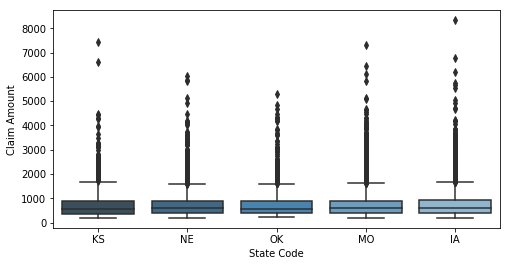

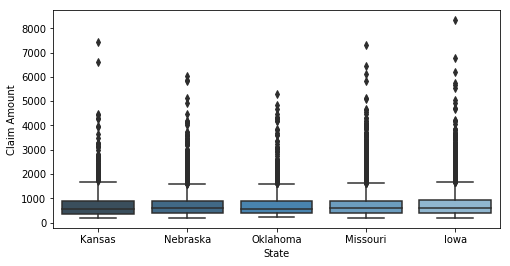

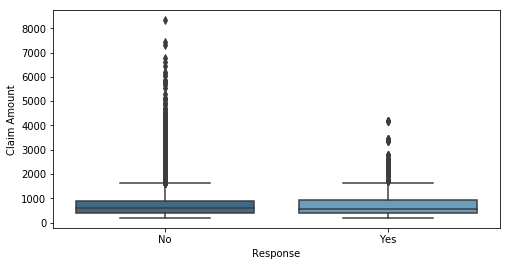

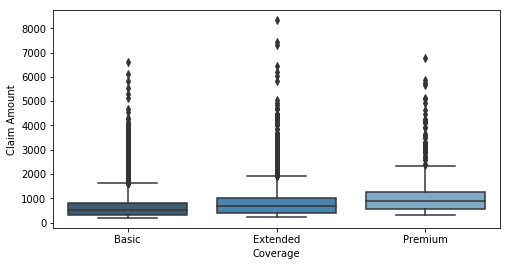

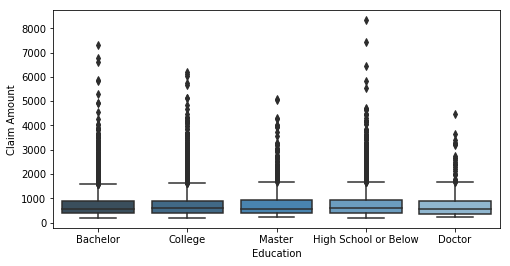

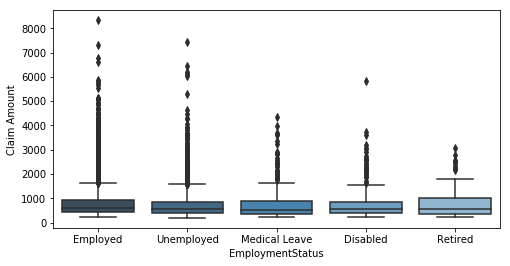

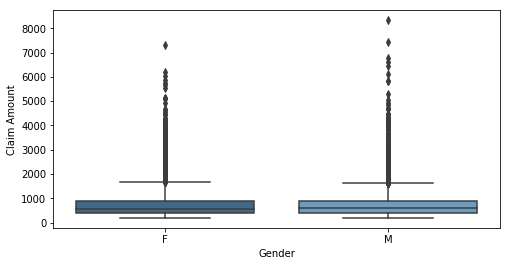

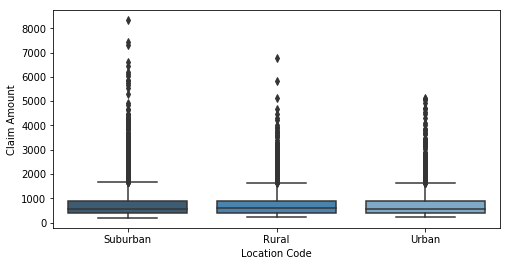

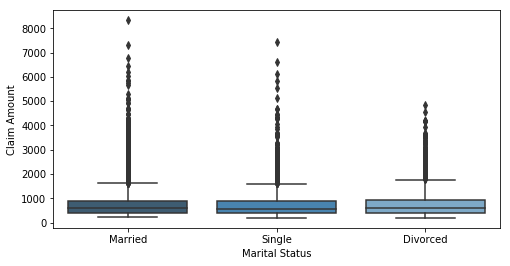

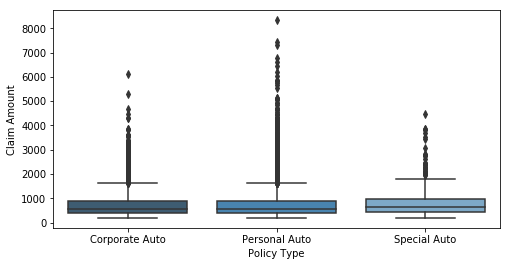

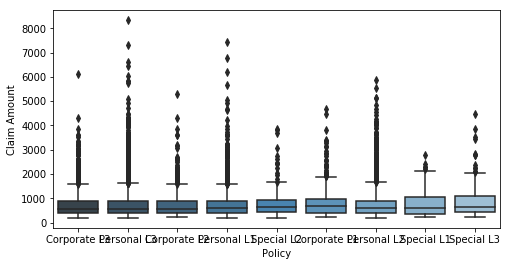

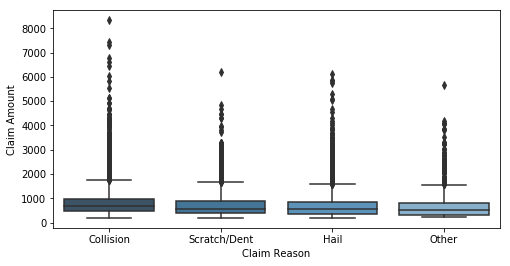

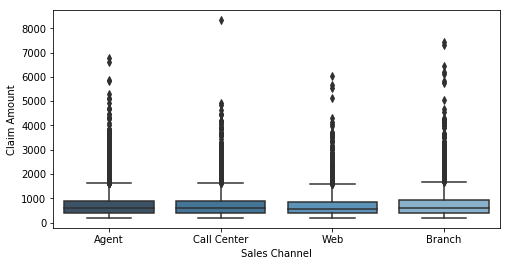

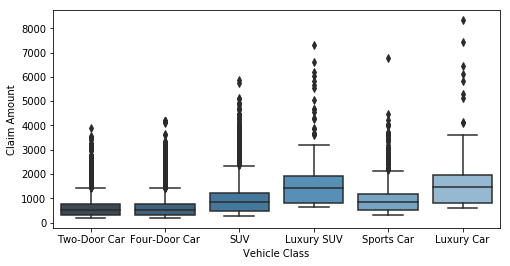

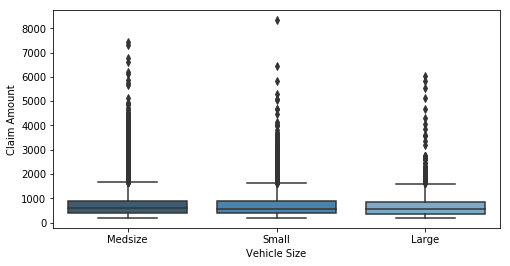

In [19]:
import warnings
warnings.filterwarnings("ignore")
#columns=list(data.columns)
list1=['State Code','State','Response','Coverage','Education','EmploymentStatus','Gender','Location Code','Marital Status','Policy Type','Policy','Claim Reason','Sales Channel','Vehicle Class','Vehicle Size']
for i in list1 :
    plt.figure(figsize=(8,4))
    sns.boxplot(x=i,y='Claim Amount', data=data, palette="Blues_d")
    plt.show()

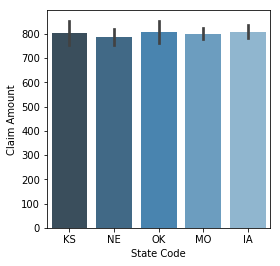

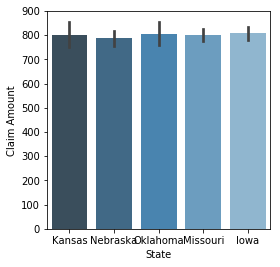

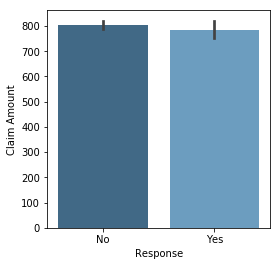

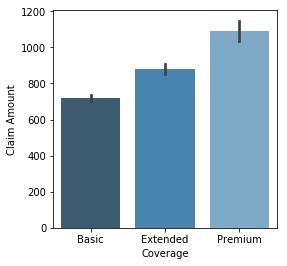

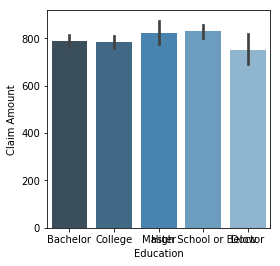

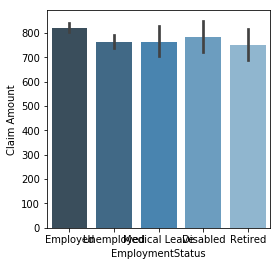

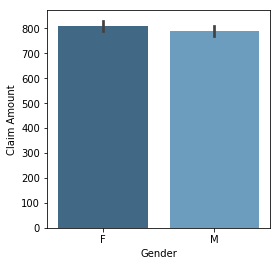

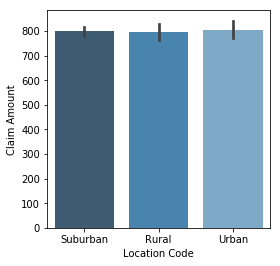

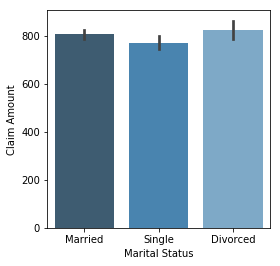

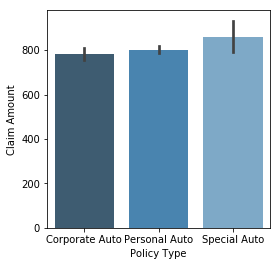

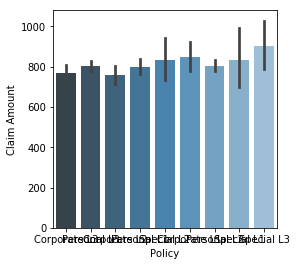

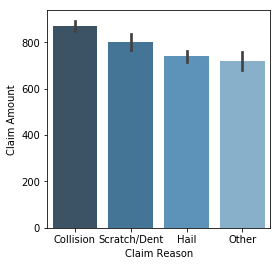

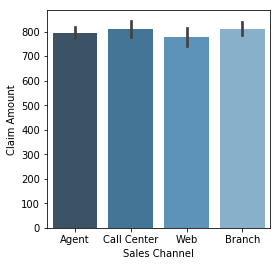

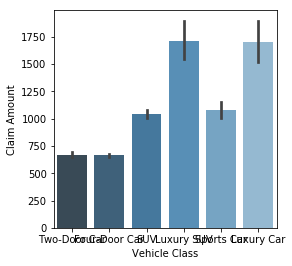

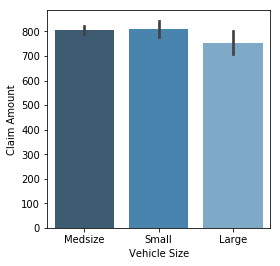

In [9]:
import warnings
warnings.filterwarnings("ignore")
list1=['State Code','State','Response','Coverage','Education','EmploymentStatus','Gender','Location Code','Marital Status','Policy Type','Policy','Claim Reason','Sales Channel','Vehicle Class','Vehicle Size']
for i in list1 :
    plt.figure(figsize=(4,4))
    sns.barplot(x=i,y='Claim Amount', data=data, palette="Blues_d")
    plt.show()

# Encoding the non numeric Columns

In [20]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
list1=['State Code','State','Response','Coverage','Education','EmploymentStatus','Gender','Location Code','Marital Status','Policy Type','Policy','Claim Reason','Sales Channel','Vehicle Class','Vehicle Size']
for val in list1:
    data[val]=Le.fit_transform(data[val].astype(str))


# Familiarisation with the DataSet

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
State Code                       9134 non-null int32
State                            9134 non-null int32
Claim Amount                     9134 non-null float64
Response                         9134 non-null int32
Coverage                         9134 non-null int32
Education                        9134 non-null int32
EmploymentStatus                 9134 non-null int32
Gender                           9134 non-null int32
Income                           9134 non-null int64
Location Code                    9134 non-null int32
Marital Status                   9134 non-null int32
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               9134 non-null int64
Policy Type                      9134 non-n

In [11]:
data.describe()

,State Code,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,...,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,1.722684,1.722684,800.494047,0.143201,0.480622,1.554084,1.825706,0.490037,37657.380009,0.979089,...,48.064594,0.384388,2.966170,0.825925,3.797788,1.014889,1.102693,434.088794,1.892380,1.089556
std,1.312397,1.312397,687.096761,0.350297,0.655817,1.381978,1.347793,0.499928,30379.904734,0.605732,...,27.905991,0.910384,2.390182,0.475989,1.605978,1.072331,1.069452,290.500092,2.072992,0.537313
min,0.000000,0.000000,189.800768,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.099007,0.000000,0.000000
25%,0.000000,0.000000,399.425179,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,24.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,272.258244,0.000000,1.000000
50%,2.000000,2.000000,578.018220,0.000000,0.000000,1.000000,1.000000,0.000000,33889.500000,1.000000,...,48.000000,0.000000,2.000000,1.000000,4.000000,1.000000,1.000000,383.945434,0.000000,1.000000
75%,3.000000,3.000000,896.216704,0.000000,1.000000,3.000000,4.000000,1.000000,62320.000000,1.000000,...,71.000000,0.000000,4.000000,1.000000,5.000000,2.000000,2.000000,547.514839,4.000000,1.000000
max,4.000000,4.000000,8332.538119,1.000000,2.000000,4.000000,4.000000,1.000000,99981.000000,2.000000,...,99.000000,5.000000,9.000000,2.000000,8.000000,3.000000,3.000000,2893.239678,5.000000,2.000000


# Plotting the distribution Plots

<Figure size 144x144 with 0 Axes>

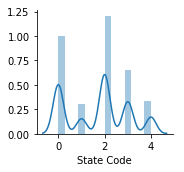

<Figure size 144x144 with 0 Axes>

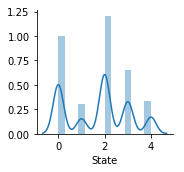

<Figure size 144x144 with 0 Axes>

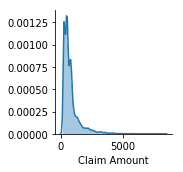

<Figure size 144x144 with 0 Axes>

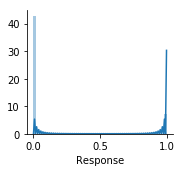

<Figure size 144x144 with 0 Axes>

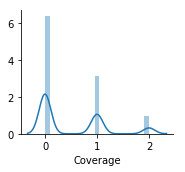

<Figure size 144x144 with 0 Axes>

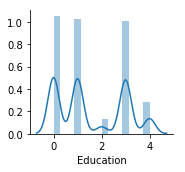

<Figure size 144x144 with 0 Axes>

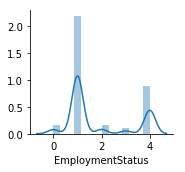

<Figure size 144x144 with 0 Axes>

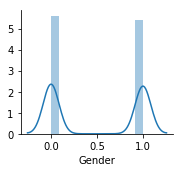

<Figure size 144x144 with 0 Axes>

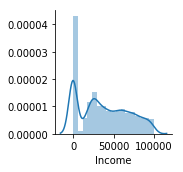

<Figure size 144x144 with 0 Axes>

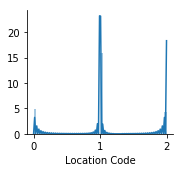

<Figure size 144x144 with 0 Axes>

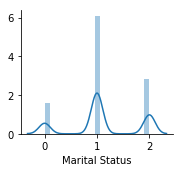

<Figure size 144x144 with 0 Axes>

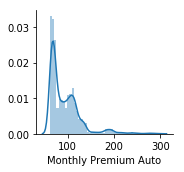

<Figure size 144x144 with 0 Axes>

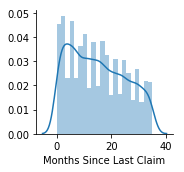

<Figure size 144x144 with 0 Axes>

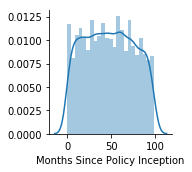

<Figure size 144x144 with 0 Axes>

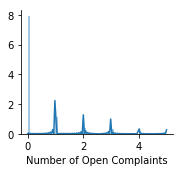

<Figure size 144x144 with 0 Axes>

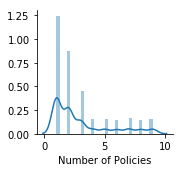

<Figure size 144x144 with 0 Axes>

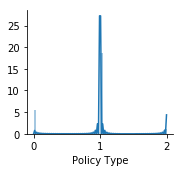

<Figure size 144x144 with 0 Axes>

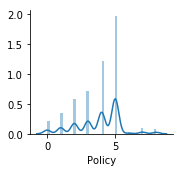

<Figure size 144x144 with 0 Axes>

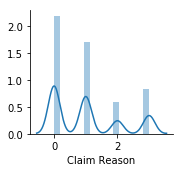

<Figure size 144x144 with 0 Axes>

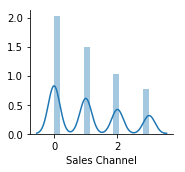

<Figure size 144x144 with 0 Axes>

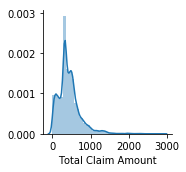

<Figure size 144x144 with 0 Axes>

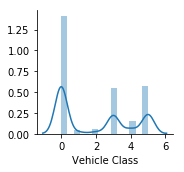

<Figure size 144x144 with 0 Axes>

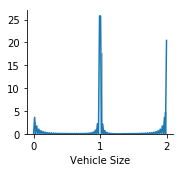

NameError: name 'y' is not defined

In [13]:
columns=data.columns
for val in columns:
    plt.figure(figsize=(2,2))
    sns.FacetGrid(data,size=2.5)\
    .map(sns.distplot,val)\
    .add_legend();
plt.show();
sns.distplot(y)
plt.show()

# Plotting Line Plots

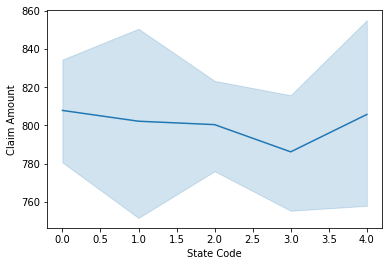

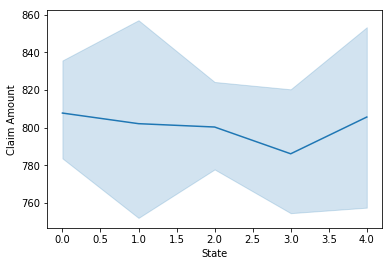

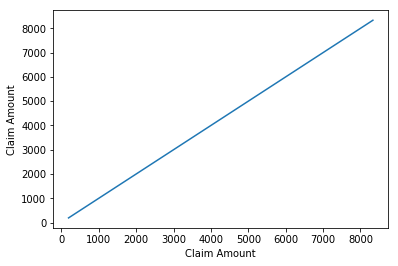

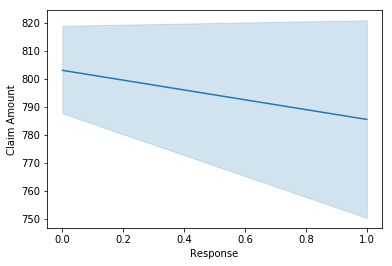

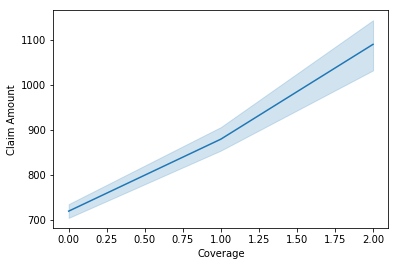

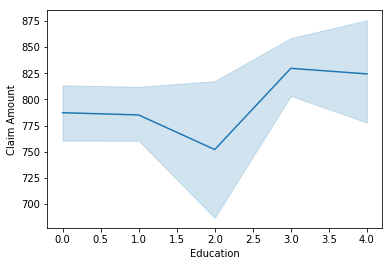

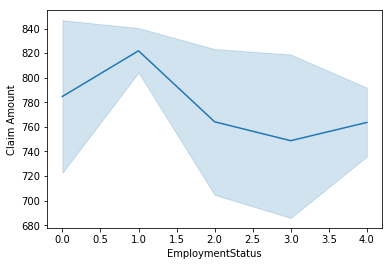

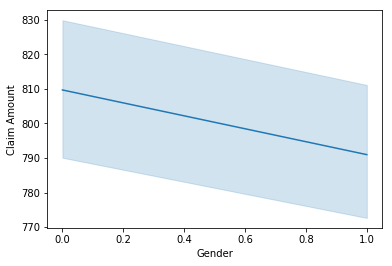

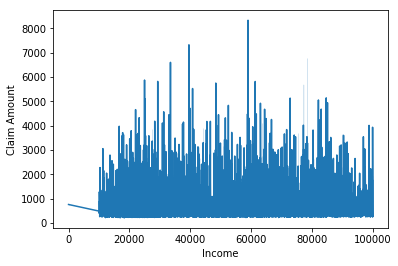

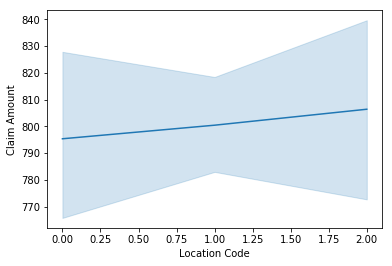

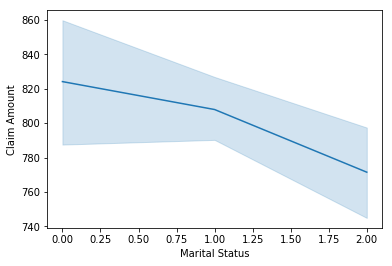

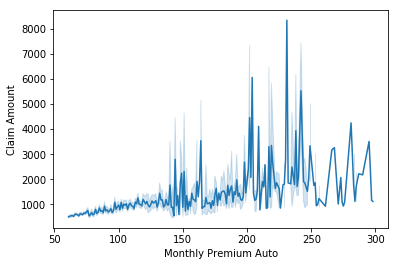

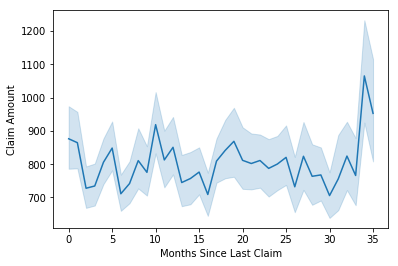

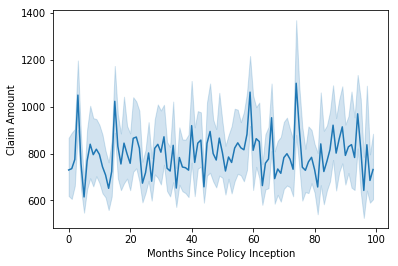

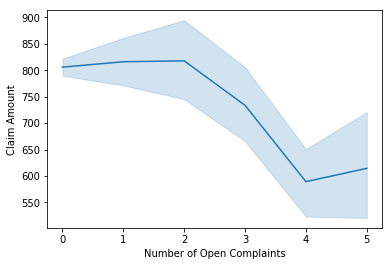

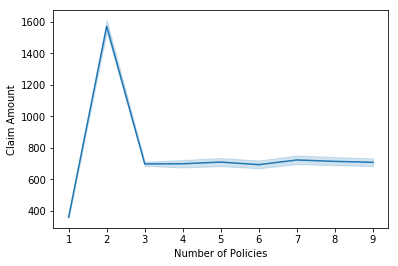

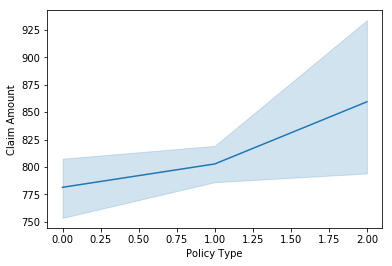

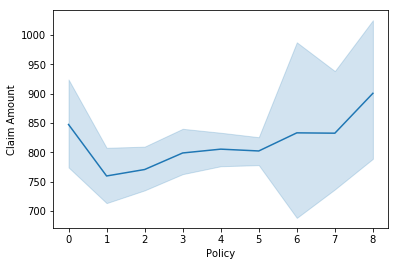

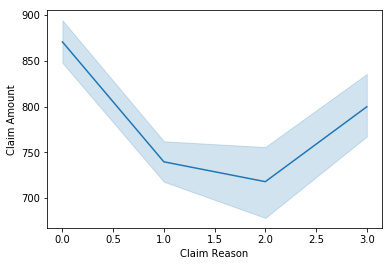

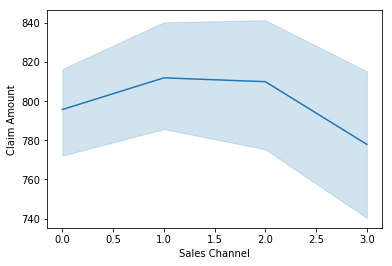

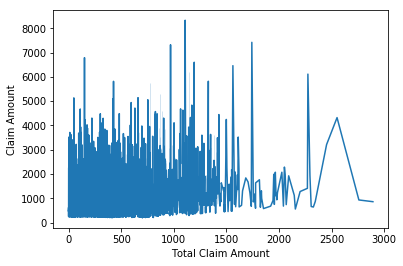

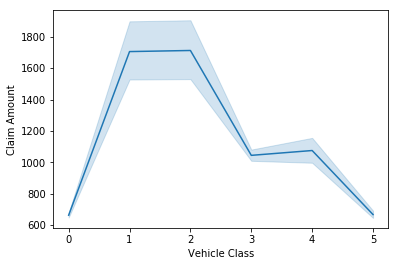

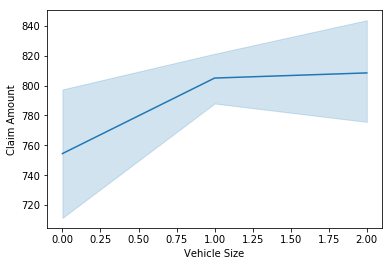

In [12]:
column=list(data.columns)
for val in column:
    sns.lineplot(x=val,y='Claim Amount', data=data)
    plt.show()

Above Line Plots shows the relation between the claim amount and other features of the dataset , this helps us to identify which feature has larger part in the amount contribution as per the linearilty

In [ ]:
sns.pairplot(data)

# CorRelation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

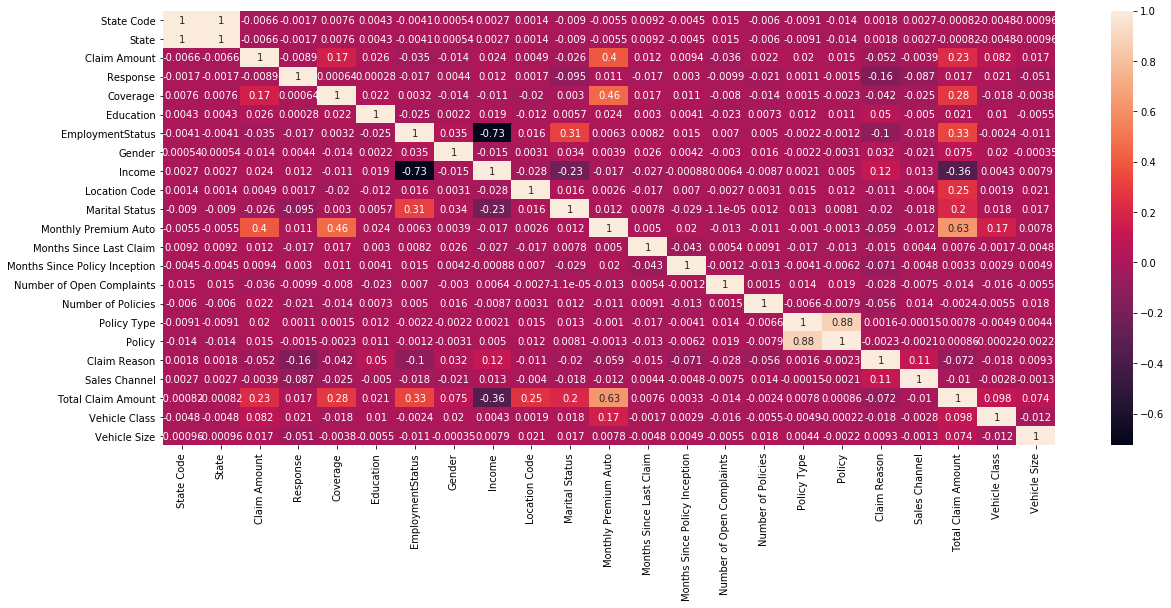

In [21]:
df_cor=data.corr()
plt.figure(figsize=(20,8))
sns.heatmap(df_cor,annot=True)

# Feature selection based on correlation matrix
From the below code I have removed the features which are having correlation of more than 0.6. This results in stable parameter estimates of classification which makes it easy to assess the effect of independent variables on dependent variables

In [22]:
columns = np.full((df_cor.shape[0]),True,dtype=bool)
for i in range(df_cor.shape[0]):
    for j in range(i+1, df_cor.shape[0]):
        if df_cor.iloc[i,j] >= 0.6:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [23]:
data.shape

(9134, 20)

In [56]:
data.head()

,State Code,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
0,1,276.351928,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,0,0,5,1
1,3,697.953590,0,1,0,4,0,0,1,2,94,13,42,0,8,1,3,0,0,1
2,4,1288.743165,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,0,0,5,1
3,2,764.586183,0,0,0,4,1,0,1,1,106,18,65,0,7,0,0,2,3,1
4,1,281.369258,0,0,0,1,1,43836,0,2,73,12,44,0,1,1,0,0,0,1


# Handling Outliers

In [24]:
from scipy.stats import zscore
zs=np.abs(zscore(data))
zs

array([[0.55068994, 0.76287773, 0.40882171, ..., 1.03113846, 1.49918077,
        0.16668206],
       [0.97332215, 0.14924546, 0.40882171, ..., 1.03113846, 0.91292371,
        0.16668206],
       [1.73532819, 0.71063622, 0.40882171, ..., 1.03113846, 1.49918077,
        0.16668206],
       ...,
       [0.21131611, 0.02313483, 0.40882171, ..., 0.09602938, 0.91292371,
        0.16668206],
       [0.21131611, 0.06993547, 0.40882171, ..., 0.09602938, 0.91292371,
        2.0278971 ],
       [0.21131611, 0.78495478, 0.40882171, ..., 0.83907971, 1.49918077,
        0.16668206]])

In [25]:
df=data[(zs<3).all(axis=1)]
print('shape of the data with outliers  ' ,data.shape)
print('shape of the data without  outliers  ' ,df.shape)

shape of the data with outliers   (9134, 20)
shape of the data without  outliers   (8552, 20)


In this section we have treated the outliers with the help of ZSCORE using threshold value as 3 ,The features which are having the zscore value > 3 are treated as outliers and have been removed.

Hence the new shape of the dataset after outliers removal is (8552, 20) . Now this will be our finalised Dataset for modelling.

In [26]:
df.skew()

State Code                       0.019904
Claim Amount                     1.823572
Response                         2.046678
Coverage                         1.081236
Education                        0.336874
EmploymentStatus                 0.818494
Gender                           0.037899
Income                           0.292416
Location Code                    0.011274
Marital Status                  -0.108429
Monthly Premium Auto             1.398365
Months Since Last Claim          0.283127
Months Since Policy Inception    0.048902
Number of Open Complaints        2.573377
Number of Policies               1.224515
Policy Type                     -0.460299
Claim Reason                     0.728820
Sales Channel                    0.504892
Vehicle Class                    0.401979
Vehicle Size                     0.070288
dtype: float64

In [27]:
from scipy import stats
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [28]:
column_list=['State Code','Claim Amount', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Claim Reason', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

# Standard Scaling the data for normalisation

In [29]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(df)

In [30]:
df=pd.DataFrame(x)

In [31]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.550641,-1.301090,-0.407524,-0.751169,-1.120656,-0.547251,-0.981233,0.612365,0.037064,-0.194259,-0.807507,1.684328,-1.536521,-0.454506,-1.010736,-1.721519,-1.082082,-1.034370,1.482418,-0.16101
1,0.974322,0.262003,-0.407524,1.009229,-1.120656,1.504593,-0.981233,-1.232988,0.037064,1.380436,0.320478,-0.204144,-0.209125,-0.454506,1.817822,0.370924,1.569843,-1.034370,-0.896483,-0.16101
2,1.736803,1.298004,-0.407524,2.038996,-1.120656,-0.547251,-0.981233,0.366193,0.037064,-0.194259,0.828253,0.292822,-0.352627,-0.454506,-0.248221,0.370924,-1.082082,-1.034370,1.482418,-0.16101
3,0.211840,0.415992,-0.407524,-0.751169,-1.120656,1.504593,1.019126,-1.232988,0.037064,-0.194259,0.759850,0.292822,0.616014,-0.454506,1.596320,-1.721519,-1.082082,0.837191,0.530858,-0.16101
4,-0.550641,-1.270771,-0.407524,-0.751169,-1.120656,-0.547251,1.019126,0.204495,-1.605265,1.380436,-0.602250,-0.303538,-0.137373,-0.454506,-1.010736,0.370924,-1.082082,-1.034370,-0.896483,-0.16101


In [32]:
df.columns=[i for i in column_list]

In [33]:
df.shape

(8552, 20)

In [34]:
df.head()

,State Code,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
0,-0.550641,-1.301090,-0.407524,-0.751169,-1.120656,-0.547251,-0.981233,0.612365,0.037064,-0.194259,-0.807507,1.684328,-1.536521,-0.454506,-1.010736,-1.721519,-1.082082,-1.034370,1.482418,-0.16101
1,0.974322,0.262003,-0.407524,1.009229,-1.120656,1.504593,-0.981233,-1.232988,0.037064,1.380436,0.320478,-0.204144,-0.209125,-0.454506,1.817822,0.370924,1.569843,-1.034370,-0.896483,-0.16101
2,1.736803,1.298004,-0.407524,2.038996,-1.120656,-0.547251,-0.981233,0.366193,0.037064,-0.194259,0.828253,0.292822,-0.352627,-0.454506,-0.248221,0.370924,-1.082082,-1.034370,1.482418,-0.16101
3,0.211840,0.415992,-0.407524,-0.751169,-1.120656,1.504593,1.019126,-1.232988,0.037064,-0.194259,0.759850,0.292822,0.616014,-0.454506,1.596320,-1.721519,-1.082082,0.837191,0.530858,-0.16101
4,-0.550641,-1.270771,-0.407524,-0.751169,-1.120656,-0.547251,1.019126,0.204495,-1.605265,1.380436,-0.602250,-0.303538,-0.137373,-0.454506,-1.010736,0.370924,-1.082082,-1.034370,-0.896483,-0.16101


# Separating Input/Output Variables

In [35]:
y=df['Claim Amount']
x=df.drop(['Claim Amount'],axis=1)


# Applying Various Regression Models
In this section we will be applying several regressor models and hence we will be checking following performance matrix :

1) R2 score

2) Root mean sqaure Error

3) Mean of crossing validation score using R2 as scoring

4) Std Deviation of crossing validation score using R2 as scoring

We have also used GridSearch for tuning the parameters

In [36]:
#importing the libraries
from sklearn.model_selection import train_test_split
from  sklearn.metrics import r2_score

# Function for R2 Score
This function is built to find the best r2 score depending on the random state while splitting the model. This function prints the best r2 score and returns the random state for that R2 score

In [37]:
from  sklearn.metrics import r2_score
def max_r2_score(model,x,y):
    random_state=np.arange(42,101)
    max_r2_score=0
    for r_state in random_state:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
        model.fit(train_x,train_y)
        pred = model.predict(test_x)
        r2_scr=r2_score(test_y,pred)
        #print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_DT)))
        if r2_scr > max_r2_score:
            max_r2_score=r2_scr
            Final_r_state=r_state
    print('The maximum r2 score  is {} at random state {}' .format(max_r2_score,Final_r_state))
    return Final_r_state

# Function for RMSE
This function finds the rmse of the model using the random state at best r2 score

In [38]:
from sklearn.model_selection import cross_val_score
def rmse(model,x,y,Final_r_state):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=Final_r_state)
    model.fit(train_x,train_y)
    pred = model.predict(test_x)
    rmse=cross_val_score(model,x,y,cv=10,scoring='neg_mean_squared_error').mean()
    print('mean cross_val_score using RMSE as a scoring parameter',rmse)
    return rmse

Below function is created to make a list of rmse generated by different regressor , so that it can be compared at last, for the selection of the best model

In [39]:
rmse_list=[]
def list_rmse(RMSE):
    rmse_list.append(RMSE)
    return rmse_list

# 1.Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
Final_r_state=max_r2_score(lreg,x,y)

The maximum r2 score  is 0.31418138175089505 at random state 64


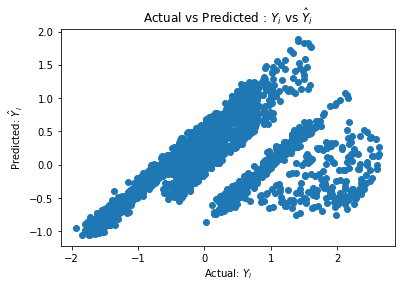

In [41]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=64)
Y_pred = lreg.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("Actual: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [42]:
print('mean cross_val_score',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())

mean cross_val_score 0.2890357303074208
std deviation of cross_val_score 0.014490500559925769


In [43]:
RMSE=rmse(lreg,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using RMSE as a scoring parameter -0.7096243308851478


# 2.KNeighborsRegressor

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gs=GridSearchCV(knr,neighbors,cv=10)
gs.fit(x,y)
gs.best_params_

{'n_neighbors': 11}

In [45]:
knr=KNeighborsRegressor(n_neighbors=11)
Final_r_state=max_r2_score(knr,x,y)

The maximum r2 score  is 0.32337851083831415 at random state 85


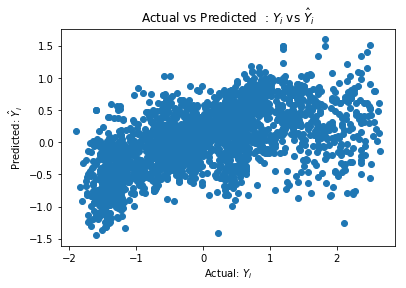

In [135]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=85)
Y_pred = knr.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("Actual: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted  : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [46]:
print('mean cross_val_score using R2 as parameter',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score using  R2 as parameter',cross_val_score(knr,x,y,cv=5,scoring='r2').std())
RMSE=rmse(knr,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using R2 as parameter 0.30906490245133067
std deviation of cross_val_score using  R2 as parameter 0.01224876062295311
mean cross_val_score using RMSE as a scoring parameter -0.683837574050804


# 3. Lasso Regression

In [47]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameter={"alpha":[0.001,0.01,0.1,1]}
gs=GridSearchCV(lsreg,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'alpha': 0.001}

In [48]:
lsreg=Lasso(alpha=0.001)
Final_r_state=max_r2_score(lsreg,x,y)

The maximum r2 score  is 0.31409530110075357 at random state 64


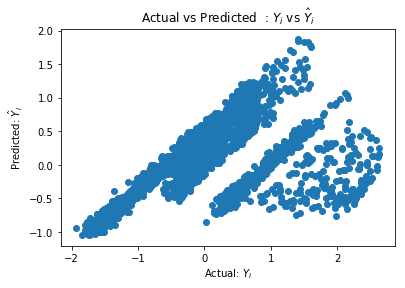

In [49]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=64)
Y_pred = lsreg.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("Actual: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted  : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [50]:
print('mean cross_val_score using R2 as parameter',cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score using  R2 as parameter',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())
RMSE=rmse(lsreg,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using R2 as parameter 0.28916856949053094
std deviation of cross_val_score using  R2 as parameter 0.014337131850935663
mean cross_val_score using RMSE as a scoring parameter -0.7095262222814995


# 4.DecisionTreeRegressor

In [51]:
from sklearn.tree import DecisionTreeRegressor
depth={'max_depth':range(1,30)}
dt=DecisionTreeRegressor()
gs=GridSearchCV(dt,depth,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 8}

In [52]:
DT=DecisionTreeRegressor(max_depth=8)
Final_r_state=max_r2_score(DT,x,y)

The maximum r2 score  is 0.9167973860231273 at random state 74


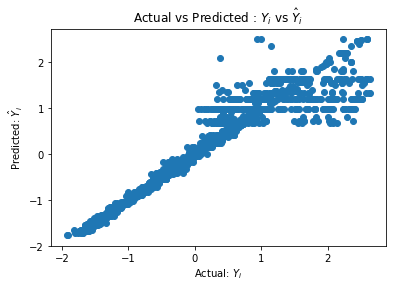

In [53]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=74)
Y_pred = DT.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("Actual: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [54]:
print('mean cross_val_score using R2 as parameter',cross_val_score(DT,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score using  R2 as parameter',cross_val_score(DT,x,y,cv=5,scoring='r2').std())
RMSE=rmse(DT,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using R2 as parameter 0.9064084761375588
std deviation of cross_val_score using  R2 as parameter 0.00996649149311807
mean cross_val_score using RMSE as a scoring parameter -0.09074788555316425


# Appying ensemble model for better results


# 1.GradientBoostingRegressor

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
gbr=GradientBoostingRegressor()
gs=GridSearchCV(gbr,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [56]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
Final_r_state=max_r2_score(gbr,x,y)

The maximum r2 score  is 0.9234003518281353 at random state 64


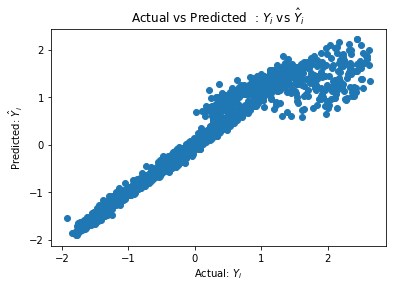

In [57]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=64)
Y_pred = gbr.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("Actual: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted  : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [58]:
print('mean cross_val_score using R2 as parameter',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score using  R2 as parameter',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())
RMSE=rmse(gbr,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using R2 as parameter 0.9188478178345332
std deviation of cross_val_score using  R2 as parameter 0.003839028480633779
mean cross_val_score using RMSE as a scoring parameter -0.08112448584070678


# Plotting Bargraph to Analyse the Performance Matrix

In [60]:
model_list=['linearRegression',' KNR','LASSO','DTR','GBR']

Text(0.5,1,'BarPlot between RMSE and Models')

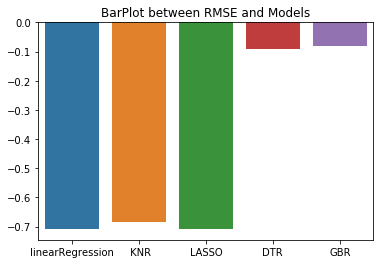

In [61]:
sns.barplot(x=model_list,y=List_rmse)
plt.title("BarPlot between RMSE and Models")

In [62]:
maxm_r2=['0.31','0.32','0.31','0.91','0.92']

Text(0.5,1,'BarPlot between R2-Score and Models')

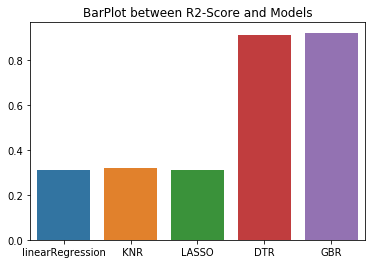

In [63]:
sns.barplot(x=model_list,y=maxm_r2)
plt.title("BarPlot between R2-Score and Models")

After performing several regressor models on this data set and after analysing the performance matrix for all the models , it is concluded that GradientBoostingRegressor is giving the best results which are as follows :

The maximum r2 score  is 0.9234003518281353 at random state 64

mean cross_val_score using R2 as parameter 0.9188478178345332

std deviation of cross_val_score using  R2 as parameter 0.003839028480633779

mean cross_val_score using RMSE as a scoring parameter -0.08112448584070678

Therefore GradientBoostingRegressor is selected as our final model

# FINAL MODEL---GradientBoostingRegressor

In [64]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=64)
gbr.fit(train_x,train_y)
pred = gbr.predict(test_x)
r2_scr=r2_score(test_y,pred)

In [65]:
from sklearn.metrics import mean_squared_error
print('RMSE',np.sqrt(mean_squared_error(test_y,pred)))
print('r2_score',r2_score(test_y,pred))
print('mean cross_val_score',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

RMSE 0.2752111375612377
r2_score 0.9235316610463721
mean cross_val_score 0.9187578151149097
std deviation of cross_val_score 0.00386086460201107


In [66]:
from sklearn.externals import joblib
joblib.dump(gbr,"GBR_insuranceclaimamount.pkl")

['GBR_insuranceclaimamount.pkl']

# Conclusion 

The project is about predicting the claim amount based on various features('State Code', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Claim Reason', 'Sales Channel', 'Vehicle Class', 'Vehicle Size')

So as per the work ,we have performed the null value analysis , EDA and aslo handled the outliers .

In the last section of the work , we have used several regressor models for the prediction and based on the performance matrix we have selected GradientBoostingRegressor as our Final model. as r2 score for this is maximum .

At last we have saved the final model using joblib.